In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
UserTweets = pd.read_csv("/home/is/shuntaro-o/dev/persons_move_analysis/data/202210_1month_per_hour.csv")
UserPlase = pd.read_csv('/home/is/shuntaro-o/dev/disaster_analysis_Twitter/data/TweetPlaces_Japan7Cities/FoursquareUserPlacesTokyo_20210419.txt', sep=',', lineterminator='\n', header=None,names = ['place_id', 'city_name', 'object', 'country', 'UserPlase_longitude', 'UserPlase_latitude', 'UserPlase_sub_longitude', 'UserPlase_sub_latitude'])

/tmp/ipykernel_13305/4222905244.py:1: DtypeWarning: Columns (6,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  UserTweets = pd.read_csv("/home/is/shuntaro-o/dev/persons_move_analysis/data/202210_1month_per_hour.csv")


In [3]:
UserPlase =UserPlase[~UserPlase.duplicated(subset='place_id')]
UserPlase = UserPlase.reset_index(drop=True)
UserTweets = UserTweets.reset_index(drop=True)
merged_Tweet_place = pd.merge(UserTweets , UserPlase, how='left', on = "place_id")
merged_Tweet_place = merged_Tweet_place.reset_index(drop=True)
merged_Tweet_place = merged_Tweet_place.dropna(subset=['UserPlase_latitude','UserPlase_longitude'])
def UTM_cal(lat,lon):
    p,a=divmod(lat*60,40)
    q,b=divmod(a,5)
    r,c=divmod(b*60,30)
    s,d=divmod(c,15)
    t,e=divmod(d,7.5)

    u=str(lon-100)[0:2]
    f=lon-int(u)-100
    v,g=divmod(f*60,7.5)
    w,h=divmod(g*60,45)
    x,i=divmod(h,22.5)
    y,j=divmod(i,11.25)

    m=(s*2)+(x+1)
    n=(t*2)+(y+1)
    p=int(p)
    u=int(u)
    q=int(q)
    v=int(v)
    r=int(r)
    w=int(w)
    m=int(m)
    n=int(n)

    ans=str(p)+str(u)+str(q)+str(v)
    ans=int(ans)
    return(ans)
code_list=[]
for index, r in merged_Tweet_place.iterrows():
    ans=UTM_cal(r.UserPlase_latitude,r.UserPlase_longitude)
    code_list.append(ans)
merged_Tweet_place = merged_Tweet_place.reset_index(drop=True)
code_list=pd.Series(code_list)
merged_Tweet_place=pd.concat([merged_Tweet_place,code_list],axis=1)
merged_Tweet_place=merged_Tweet_place.rename(columns={0: 'code_estimation'})

In [4]:
df_one_day = merged_Tweet_place

In [5]:
df_one_day["created_at"]=df_one_day["created_at"].astype(str)
created_time=df_one_day.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_one_day=pd.concat([df_one_day,creatid_at_day_list],axis=1)
df_one_day=df_one_day.rename(columns={0: 'creatid_at_day'})
df_one_day=pd.concat([df_one_day,creatid_at_hour_list],axis=1)
df_one_day=df_one_day.rename(columns={0: 'creatid_at_hour'})

In [6]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [7]:
df_one_day = df_one_day[df_one_day['creatid_at_day'].isin(day_list)]
df_one_day = df_one_day[df_one_day['creatid_at_hour'].isin(hour_list)]

In [8]:
df_one_day['created_at'] = pd.to_datetime(df_one_day['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [9]:
df_one_day

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
0,0,@Xing98183279 それも良いけどロリデ行こうよ🏰👗🤴👸,2022-10-01 00:59:57,0.0,1.0,0.0,0,65b41c11aca77bdb,4843678447,kanako_tv,...,千葉 浦安市,city,日本,139.872407,35.616612,139.939631,35.672793,533936,01,00
1,1,@marie_tada 優良ドライバーさん🥇,2022-10-01 00:59:54,0.0,0.0,1.0,0,f1299e526e0cc34d,1312247388745023488,1gaAZHQButVBi2D,...,千葉 佐倉市,city,日本,140.126120,35.624589,140.301034,35.766545,534031,01,00
2,2,ここ最近ずっとネガティブとポジティブが戦ってて、やっとポジティブが勝ちもうした！拍手！,2022-10-01 00:59:53,0.0,0.0,0.0,0,77173905596af4ab,449521349,seritakn,...,東京 文京区,city,日本,139.717275,35.699474,139.772477,35.735929,533945,01,00
3,3,@azumiruu 有識者が教えてくれたらいいなぁw,2022-10-01 00:59:52,0.0,0.0,2.0,0,4c1c4868f96634ed,1060387314369683456,pIzV0hATvm8aKYG,...,東京 江東区,city,日本,139.771307,35.582057,139.849007,35.708066,533926,01,00
4,4,@Shin_Saunaaa ご無事で何よりです！おデート楽しんでください❤️‍🔥,2022-10-01 00:59:50,0.0,1.0,1.0,0,db215c78c59027e4,1573305402208686081,tosakuuuuun_jp,...,千葉 市川市,city,日本,139.885492,35.655568,139.976610,35.775796,533937,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69884,95,今日の #夕暮れ はなんとも心動かされる色合いだった。鉄塔もいい感じに撮れた / today...,2022-10-31 23:57:58,0.0,0.0,2.0,0.0,1ea0fd1a31366833,7199952.0,wakaski,...,神奈 横浜市 都筑区,city,日本,139.543097,35.507956,139.616102,35.566753,533924,31,23
69885,96,お台場 Tokyoに写真を投稿しましたhttps://t.co/GJcY9s06SY,2022-10-31 23:57:57,0.0,0.0,0.0,0.0,594fa6c6bc5b5ba9,110322291.0,paulsmith_,...,東京 港区,city,日本,139.708754,35.622973,139.782004,35.682605,533935,31,23
69886,97,@jilmariya おめでとうございます㊗️㊗️㊗️作品、必ず拝見します👀,2022-10-31 23:57:55,0.0,1.0,1.0,0.0,bcf7dca0cae1c2e6,1088408401.0,emo4488,...,神奈 横浜市 南区,city,日本,139.570896,35.406284,139.641197,35.441318,533904,31,23
69887,98,これにつきまして、俺のプロレスデビューの時、感極まる人いただろうか…🤣笑いしか起きなかった様...,2022-10-31 23:57:55,0.0,0.0,1.0,0.0,a398e1f1025abe37,814713932.0,kurapin2020,...,埼玉 春日部市,city,日本,139.707880,35.935390,139.832566,36.043504,533975,31,23


In [10]:
df_Tokyo_station = df_one_day

In [11]:
df_Tokyo_station['created_at'] = pd.to_datetime(df_Tokyo_station['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [12]:
df_Tokyo_station = df_Tokyo_station.dropna(subset=['created_at'])

In [13]:
df_Tokyo_station 

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
0,0,@Xing98183279 それも良いけどロリデ行こうよ🏰👗🤴👸,2022-10-01 00:59:57,0.0,1.0,0.0,0,65b41c11aca77bdb,4843678447,kanako_tv,...,千葉 浦安市,city,日本,139.872407,35.616612,139.939631,35.672793,533936,01,00
1,1,@marie_tada 優良ドライバーさん🥇,2022-10-01 00:59:54,0.0,0.0,1.0,0,f1299e526e0cc34d,1312247388745023488,1gaAZHQButVBi2D,...,千葉 佐倉市,city,日本,140.126120,35.624589,140.301034,35.766545,534031,01,00
2,2,ここ最近ずっとネガティブとポジティブが戦ってて、やっとポジティブが勝ちもうした！拍手！,2022-10-01 00:59:53,0.0,0.0,0.0,0,77173905596af4ab,449521349,seritakn,...,東京 文京区,city,日本,139.717275,35.699474,139.772477,35.735929,533945,01,00
3,3,@azumiruu 有識者が教えてくれたらいいなぁw,2022-10-01 00:59:52,0.0,0.0,2.0,0,4c1c4868f96634ed,1060387314369683456,pIzV0hATvm8aKYG,...,東京 江東区,city,日本,139.771307,35.582057,139.849007,35.708066,533926,01,00
4,4,@Shin_Saunaaa ご無事で何よりです！おデート楽しんでください❤️‍🔥,2022-10-01 00:59:50,0.0,1.0,1.0,0,db215c78c59027e4,1573305402208686081,tosakuuuuun_jp,...,千葉 市川市,city,日本,139.885492,35.655568,139.976610,35.775796,533937,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69884,95,今日の #夕暮れ はなんとも心動かされる色合いだった。鉄塔もいい感じに撮れた / today...,2022-10-31 23:57:58,0.0,0.0,2.0,0.0,1ea0fd1a31366833,7199952.0,wakaski,...,神奈 横浜市 都筑区,city,日本,139.543097,35.507956,139.616102,35.566753,533924,31,23
69885,96,お台場 Tokyoに写真を投稿しましたhttps://t.co/GJcY9s06SY,2022-10-31 23:57:57,0.0,0.0,0.0,0.0,594fa6c6bc5b5ba9,110322291.0,paulsmith_,...,東京 港区,city,日本,139.708754,35.622973,139.782004,35.682605,533935,31,23
69886,97,@jilmariya おめでとうございます㊗️㊗️㊗️作品、必ず拝見します👀,2022-10-31 23:57:55,0.0,1.0,1.0,0.0,bcf7dca0cae1c2e6,1088408401.0,emo4488,...,神奈 横浜市 南区,city,日本,139.570896,35.406284,139.641197,35.441318,533904,31,23
69887,98,これにつきまして、俺のプロレスデビューの時、感極まる人いただろうか…🤣笑いしか起きなかった様...,2022-10-31 23:57:55,0.0,0.0,1.0,0.0,a398e1f1025abe37,814713932.0,kurapin2020,...,埼玉 春日部市,city,日本,139.707880,35.935390,139.832566,36.043504,533975,31,23


In [14]:
day=24
day = int(day)
df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]

In [15]:
df_perday

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
51897,0,@HiNack1010 おめでとう㊗社会人頑張ろう!俺は、31年やってるけど疲れた😭,2022-10-24 00:59:57,0.0,0.0,0.0,0,5f8778ba4121fee9,1512884969990852617,seguxiaoyi1,...,埼玉 見沼区,city,日本,139.625824,35.892659,139.701091,35.965437,533965,24,00
51898,1,レコードコレクターズに風色~KazairoのCD評が載りました。自分では風色の音楽を具体的に...,2022-10-24 00:59:56,0.0,0.0,3.0,0,8e483d36e0b9b001,368792754,ryofkd,...,埼玉 さいたま市 南区,city,日本,139.636556,35.831419,139.703797,35.863519,533955,24,00
51899,2,@TachibanaSerina 綺麗😍サルート＆芹那,2022-10-24 00:59:55,0.0,0.0,0.0,0,bfdffb491d839e84,2539781138,manabu19640909,...,神奈 横浜市 青葉区,city,日本,139.469164,35.524612,139.572897,35.591350,533923,24,00
51900,3,@kamo_kue2 よーさん、ありがとうございましたm(_ _)m,2022-10-24 00:59:50,0.0,1.0,2.0,0,86315f8740971686,1114811931208978433,kyyLpANmQC7k3O5,...,東京 八王子市,city,日本,139.161531,35.597798,139.430040,35.718529,533931,24,00
51901,4,眠れない…ビーコルおかわりもないし、とりあえずマックたーべよっチョコパイのパッケージ#マクド...,2022-10-24 00:59:47,0.0,0.0,0.0,0,3bbf5d8ac434a644,3245265572,51kazumi5154,...,神奈 座間市,city,日本,139.373673,35.468448,139.439115,35.515609,533912,24,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54158,95,がしやまエボリューションがしがしと久々に会った！何もしてないのにチョコ買ってくれた！わーい！！,2022-10-24 23:57:52,0.0,0.0,4.0,0,86315f8740971686,1346980706,Tomo_nb8008,...,東京 八王子市,city,日本,139.161531,35.597798,139.430040,35.718529,533931,24,23
54159,96,いつも！ありがとうございまーみん♪🍜😭 https://t.co/Lh5wXnIMA3,2022-10-24 23:57:50,1.0,0.0,27.0,0,18d30ff8086ed40c,1407401027351900161,hJ3IfEpz3UIxrwp,...,千葉 千葉市 中央区,city,日本,140.081223,35.539120,140.184443,35.617709,534020,24,23
54160,97,@nokka37 @tokachi_sauna モンブラン…🤤🤤🤤,2022-10-24 23:57:50,0.0,0.0,1.0,0,a1383746d9e64c93,918304942137344005,kazuking550522,...,埼玉 戸田市,city,日本,139.618922,35.795328,139.699272,35.835282,533954,24,23
54161,98,見つかりますように🤞🏻#自転車盗難#東京#外神田#viper#Galibier#uber #...,2022-10-24 23:57:49,1.0,0.0,2.0,0,594fa6c6bc5b5ba9,1563073315740459015,BiciTrova,...,東京 港区,city,日本,139.708754,35.622973,139.782004,35.682605,533935,24,23


In [16]:
hour = 16
hour = int(hour)
end_time = df_perday[(df_perday['created_at'].dt.hour==hour)].head(1)['created_at'].values
start_time = df_perday[(df_perday['created_at'].dt.hour==hour)].tail(1)['created_at'].values

In [17]:
df_perday[(df_perday['created_at'].dt.hour==16)]

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
53405,0,@yamarin90598404 元ツイにたくさんコメントあるので見てみてください。,2022-10-24 16:59:57,0.0,1.0,1.0,0,1b0cfebe3424e14f,1376919346195230720,SuperSixEvo2021,...,東京 世田谷区,city,日本,139.582428,35.590036,139.686603,35.682992,533934,24,16
53406,1,20221024mon1800open.マテ茶始めました。レモンと合うのはもちろん、ガラナと...,2022-10-24 16:59:56,0.0,0.0,3.0,0,4ad3383e25ac98d9,1570332209802006528,rojiura_vinyl,...,東京 品川区,city,日本,139.695191,35.584544,139.774255,35.641576,533935,24,16
53407,2,@dECoLeNS あ、たしかに目が👀,2022-10-24 16:59:54,0.0,1.0,1.0,0,1b0cfebe3424e14f,4839557119,yukimiya01910,...,東京 世田谷区,city,日本,139.582428,35.590036,139.686603,35.682992,533934,24,16
53408,3,ZOZOの企画でKENZO（@kenzo ）とヒューチャリングした作品を作りました。代官山蔦...,2022-10-24 16:59:54,9.0,3.0,84.0,0,07d9cd609ec84001,128097379,YuukiM0rita,...,代官山 蔦屋書店,poi,日本,139.699516,35.649005,139.699516,35.649005,533935,24,16
53409,4,@flykaysandesu こんにちは🤗🌼ただいま🍀とってもキレイなコスモス🌸ですね😉見せ...,2022-10-24 16:59:54,0.0,1.0,1.0,0,afd2dbc6df82cca8,3051917425,Rie_1214_K,...,東京 江戸川区,city,日本,139.833173,35.632625,139.919043,35.750741,533936,24,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,92,@jinguzi_ren_bot 愛してる,2022-10-24 16:58:15,0.0,1.0,0.0,0,bb7a59998ec7fdba,965743795189903360,Pc2yhdO5s3kufa5,...,神奈 横浜市 緑区,city,日本,139.484513,35.490440,139.587012,35.535289,533913,24,16
53496,93,お昼休みに弾き納めしました。今日初めて来たと言う方もいましたね。やっと浸透してきた所で残念で...,2022-10-24 16:58:13,1.0,0.0,16.0,0,f7c22e0cf7b3af2b,483021026,MSG11,...,東京 渋谷区,city,日本,139.661368,35.641564,139.723884,35.692138,533935,24,16
53497,95,@ichigomilky321 🍬🍭みるきぃさん🍬🍭こんにゃちわ(^^)/3にゃんに暖かいお...,2022-10-24 16:58:10,0.0,0.0,2.0,0,962b0af43cd1ad6c,1412080992861315073,TMzMjqAHPGcd9Y4,...,神奈 横浜市 神奈川区,city,日本,139.569658,35.462307,139.668656,35.503698,533914,24,16
53498,96,@Grandblue_mica @NOBUWHIRLWIND @ninja1000_oni ...,2022-10-24 16:58:10,0.0,1.0,1.0,0,d2262f18bc1f84c5,1010081042672246784,TomoNinja1000SX,...,神奈 横浜市 磯子区,city,日本,139.588004,35.352040,139.645554,35.425086,533904,24,16


In [18]:
delta = int(end_time-start_time)*(10**(-9))
delta

108.0

In [19]:
list_tweet_range = []
for day in day_list:
    day = int(day)
    df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]
    list_tweet_range_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_per_day.append(delta)
    list_tweet_range.append(list_tweet_range_per_day)

In [20]:
list_tweets_count = []
for day in day_list:
    day = int(day)
    df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_per_hour.append(0)
    list_tweets_count.append(list_tweets_count_per_hour)

In [21]:
list_tweet_range = np.array(list_tweet_range)
list_tweets_count = np.array(list_tweets_count)

In [22]:
estimate = list_tweets_count*(3600/list_tweet_range)

Text(69.0, 0.5, 'day')

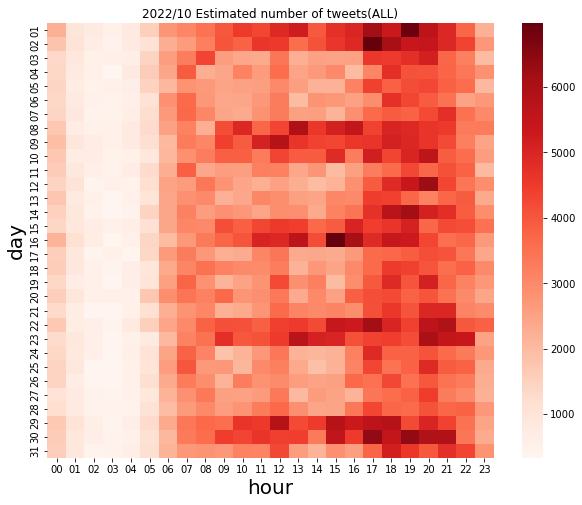

In [24]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/10 Estimated number of tweets(ALL)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)